In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pandas import Series, DataFrame

In [3]:
#sns.set_style('whitegrid')
sns.set(style="ticks", palette="Set2")
sns.despine()

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)

In [5]:
%matplotlib inline

In [6]:
%%!
open doc/2014_18.pdf
open .

[]

![metodología muestreo 1][img1]

![metodología muestreo 1][img2]

![metodología muestreo 1][img3]

[img1]: doc/1.jpg
[img2]: doc/2.jpg
[img3]: doc/3.jpg

# DATOS:

In [7]:
data_2010 = 'data/2010/dmuestra.csv'
data_2011 = 'data/2011/dmuestra.csv'

INFO = pd.read_csv('data/variables_descripcion.csv', encoding='utf-8', index_col=0)

In [8]:
INFO

,descripcion
variables,
c455,BASE IMPONIBLE GENERAL (450 ­ 451 + 452 ­ 453 ­ 454)
c620,BASE LIQUIDABLE GENERAL SOMETIDA A GRAVAMEN. (618 ­ 619)
c689,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Estatal).
c690,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Autonómica)
c698,CUOTAS INTEGRAS (693 + 696) (Parte Estatal)
c699,CUOTAS INTEGRAS (694 + 697) (Parte Autonómica)
c730,CUOTAS LIQUIDAS INCREMENTADAS ( 720 + 722 + 723 + 724 + 725 ) (Parte Estatal).
c731,CUOTAS LIQUIDAS INCREMENTADAS ( 721 + 726 + 727 + 728 + 729 ) (Parte Autonómica).
categoriadecla,Variable creada para recoger las posibles combinaciones del tipo de tributación y el estado civil.


In [9]:
data = pd.read_csv(data_2011, index_col=0)
data.head()

,c455,c620,c689,c690,c698,c699,c730,c731,c732,categoriadecla,ccaa,factoroptimizado,fechappal,ingresostrabajo,marcafuente,sexoppal,tipotributacion,tramo
0,1112414,1112414,133489,129040,2156,0,0,0,0,4,12,22.156199,19600124,0,0,1,I,5
1,12518734,11068734,2035609,2076983,2096147,2137521,2075538,2116912,4192450,4,1,1.054458,19520412,0,0,1,I,9
2,784688,784688,94162,93377,44610,44341,44610,44341,88951,4,17,53.472625,19540408,981000,1,1,I,5
3,748352,748352,89802,89802,8713,8713,0,0,0,1,8,23.522815,19650716,0,0,2,I,4
4,1103390,763390,91606,88553,40783,40783,40783,40783,81566,3,12,50.503532,19330422,1194662,1,1,C,6


/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


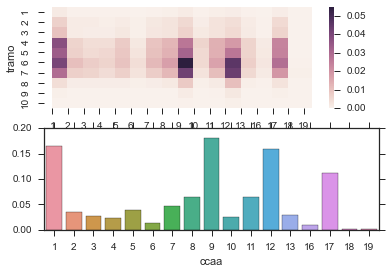

In [56]:
# distribucion de declarantes por tramo y ccaa
dist = data.pivot_table(index='tramo', columns='ccaa', values='factoroptimizado', aggfunc='sum')
N = dist.sum().sum()
dist_t = dist.sum(0) / N
dist = dist / N

ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.figure(figsize=(10,5))


sns.heatmap(dist, ax=ax1)
sns.barplot(x=dist_t.index, y=dist_t.values, ax=ax2)

In [37]:
N

ccaa
1     3220587.000009
2      699376.000000
3      532041.999999
4      470833.000001
5      775021.000001
6      278669.999999
7      902742.999999
8     1257025.000001
9     3508622.000006
10     474836.000000
11    1261576.999999
12    3098234.999999
13     575953.000000
16     165079.000001
17    2190662.999997
18      27445.000000
19      26126.000000
dtype: float64

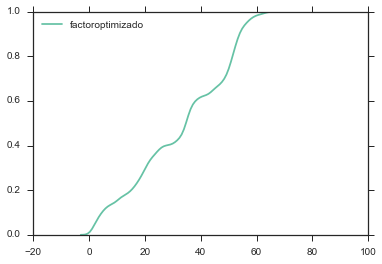

In [13]:
sns.kdeplot(data.factoroptimizado, cumulative=True)

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


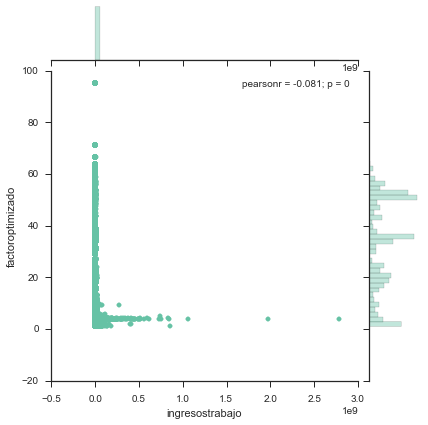

In [14]:
sns.jointplot('ingresostrabajo', 'factoroptimizado', data, )

In [26]:
dist = data[['factoroptimizado', 'ingresostrabajo', 'ccaa', 'marcafuente', 'tramo']].copy()

In [27]:
dist['F_factor'] = dist.factoroptimizado.cumsum() / dist.factoroptimizado.sum()
dist.sort(columns='ingresostrabajo', inplace=True)
dist.reset_index(inplace=True)
dist.head()

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,index,factoroptimizado,ingresostrabajo,ccaa,marcafuente,tramo,F_factor
0,0,22.156199,0,12,0,5,0.000001
1,270594,19.878981,0,9,0,2,0.449205
2,270595,18.173132,0,9,0,3,0.449206
3,270598,18.365727,0,9,0,7,0.449210
4,270613,18.173132,0,9,0,3,0.449232


In [37]:
# media de los ingresos del trabajo
np.average(dist.ingresostrabajo, weights=dist.factoroptimizado) / 100, sum(dist.ingresostrabajo * dist.factoroptimizado) / dist.factoroptimizado.sum() / 100

(20525.015049886602, 20525.015049887239)

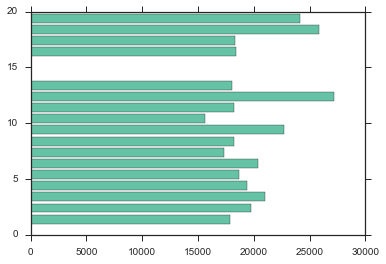

In [42]:
for ca, g in dist.groupby('ccaa'):
    plt.barh(ca, np.average(g.ingresostrabajo, weights=g.factoroptimizado)/100)
    plt.axvline(np.average(dist.ingresostrabajo, weights=dist.factoroptimizado) / 100, sum(dist.ingresostrabajo * dist.factoroptimizado) / dist.factoroptimizado.sum() / 100)